## Survival Analysis Application :
- Kaplan Meier exploration
- Churn Probabilities using churn using Kaplan Meier

In [23]:
# Install packages if not yet done
%pip install lifelines
%pip install kagglehub
%pip install openpyxl
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


#### Download kmf_upper30set

In [1]:
import kagglehub

# Download latest version
# Link : https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

print("Path to dataset files:", path)

c:\Users\Asus\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\alfathterry\telco-customer-churn-11-1-3\versions\1


### 1. Kaplan Meier Exploration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'C:\Users\Asus\.cache\kagglehub\datasets\alfathterry\telco-customer-churn-11-1-3\versions\1\telco.csv'
data   = pd.read_csv(file_path)
data.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


<Axes: xlabel='Tenure in Months', ylabel='Count'>

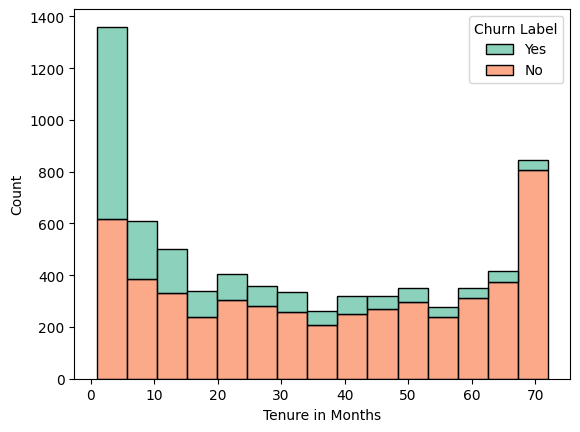

In [3]:
sns.histplot(data=data, x="Tenure in Months", hue="Churn Label", multiple="stack", palette="Set2")

<Axes: xlabel='Tenure in Months', ylabel='Count'>

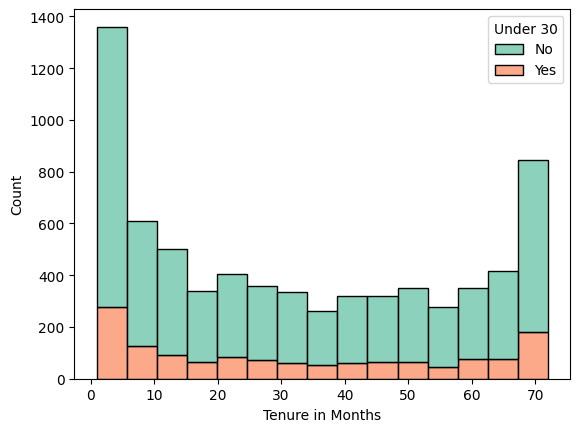

In [4]:
sns.histplot(data=data, x="Tenure in Months", hue="Under 30", multiple="stack", palette="Set2")

Drop missing value

In [5]:
data.shape

(7043, 50)

In [6]:
data.dropna(subset=['Churn Label', 'Tenure in Months', 'Under 30'], inplace=True)

In [7]:
data.shape

(7043, 50)

In [8]:
data = data[data['Tenure in Months']<=20]

In [9]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

In [10]:
data['Churn'] = data['Churn Label'].map({'Yes': 1, 'No': 0})

In [11]:
kmf.fit(data['Tenure in Months'], event_observed=data.Churn)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 2878 total observations, 1627 right-censored observations>

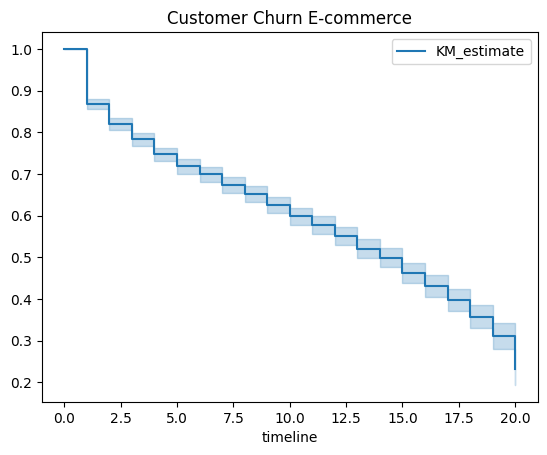

In [12]:
kmf.plot_survival_function()
plt.title('Customer Churn E-commerce');

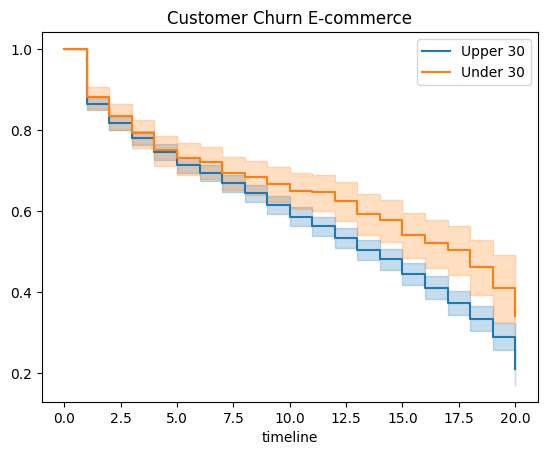

In [13]:
ax = plt.subplot(111)

Upper30 = (data['Under 30'] == "No")
Under30 = (data['Under 30'] == "Yes")

kmf_upper30 = KaplanMeierFitter().fit(data['Tenure in Months'][Upper30], event_observed=data.Churn[Upper30], label="Upper 30")
kmf_upper30.plot_survival_function(ax=ax)

kmf_under30 = KaplanMeierFitter().fit(data['Tenure in Months'][Under30], event_observed=data.Churn[Under30], label="Under 30")
kmf_under30.plot_survival_function(ax=ax)


plt.title("Customer Churn E-commerce");

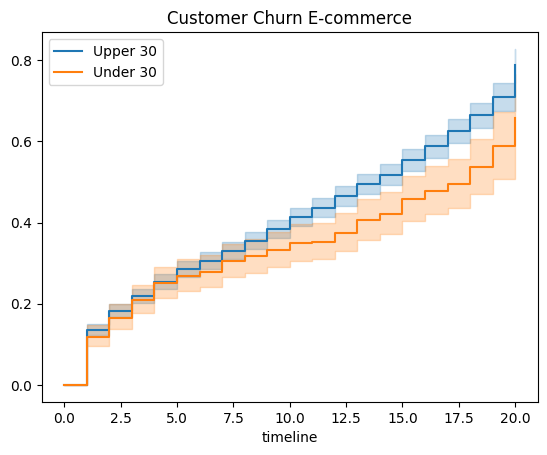

In [14]:
ax = plt.subplot(111)

kmf_upper30.plot_cumulative_density(ax=ax)
kmf_under30.plot_cumulative_density(ax=ax)
plt.title("Customer Churn E-commerce");


In [16]:
kmf_under30.cumulative_density_

,Under 30
timeline,
0.0,0.000000
1.0,0.118674
2.0,0.165264
3.0,0.208334
4.0,0.250000
5.0,0.268809
6.0,0.278723
7.0,0.305144
8.0,0.316535


### 2. Churn Probabilities using churn using Kaplan Meier

$$ P(\text{death at } t_{\text{max}} \mid \text{survived at } t) = \frac{F(t_{\text{max}}) - F(t)}{1 - F(t)} $$

In [17]:
# Calculate conditional probabilities
def conditional_probability(row):
    if row['Tenure in Months'] < t_max:
        survival_probability = 1 - row['proba_dens']
        return (F_t_max - row['proba_dens']) / survival_probability
    else:
        return None  # No conditional probability for t >= t_max

# conditional probabilities for Upper30
t_max = 20
kmf_upper30_density = kmf_upper30.cumulative_density_.reset_index()
kmf_upper30_density.columns = ['Tenure in Months','proba_dens']
F_t_max = kmf_upper30_density.loc[kmf_upper30_density['Tenure in Months'] == t_max, 'proba_dens'].values[0] 
kmf_upper30_density['conditionnal_proba_upper30'] = kmf_upper30_density.apply(conditional_probability, axis=1)

# conditional probabilities for Under30
kmf_under30_density = kmf_under30.cumulative_density_.reset_index()
kmf_under30_density.columns = ['Tenure in Months','proba_dens']
F_t_max = kmf_under30_density.loc[kmf_under30_density['Tenure in Months'] == t_max, 'proba_dens'].values[0] 
kmf_under30_density['conditionnal_proba_under30'] = kmf_under30_density.apply(conditional_probability, axis=1)

kmf_under30_density

,Tenure in Months,proba_dens,conditionnal_proba_under30
0,0.0,0.000000,0.658368
1,1.0,0.118674,0.612366
2,2.0,0.165264,0.590731
3,3.0,0.208334,0.568465
4,4.0,0.250000,0.544491
5,5.0,0.268809,0.532773
6,6.0,0.278723,0.526351
7,7.0,0.305144,0.508342
8,8.0,0.316535,0.500147
9,9.0,0.332211,0.488414


In [18]:
data = data.join(kmf_under30_density['conditionnal_proba_under30'], how='left', on='Tenure in Months')
data = data.join(kmf_upper30_density['conditionnal_proba_upper30'], how='left', on='Tenure in Months')

<Axes: xlabel='conditionnal_proba_upper30', ylabel='Count'>

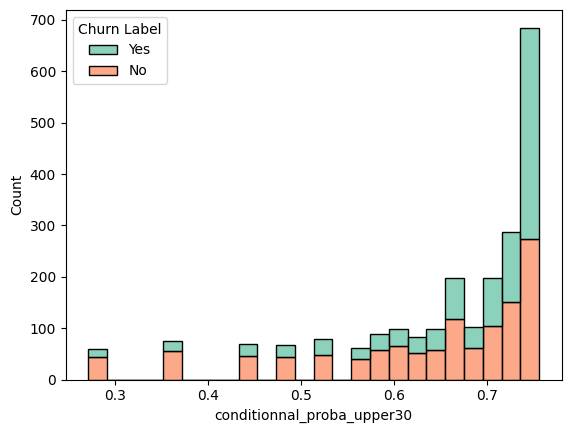

In [20]:
sns.histplot(data=data[data['Under 30']=='No'], x="conditionnal_proba_upper30", hue="Churn Label", multiple="stack", palette="Set2")


<Axes: xlabel='conditionnal_proba_under30', ylabel='Count'>

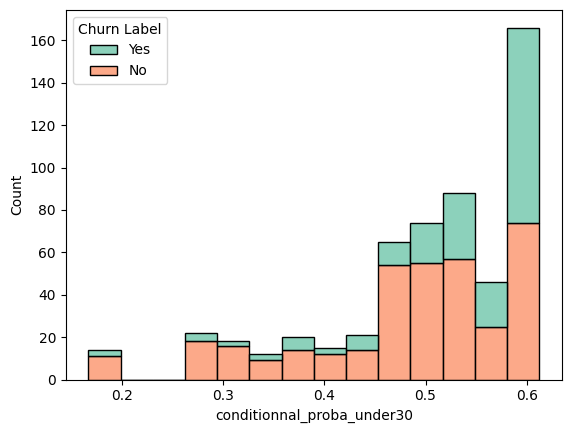

In [21]:
sns.histplot(data=data[data['Under 30']=='Yes'], x="conditionnal_proba_under30", hue="Churn Label", multiple="stack", palette="Set2")